In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
breast = load_breast_cancer()

In [3]:
breast_data = breast.data
breast_data.shape;

In [4]:
breast_input = pd.DataFrame(breast_data)
breast_input.head();

In [5]:
breast_labels = breast.target

In [6]:
labels = np.reshape(breast_labels, (569,1))

In [7]:
final_breast_data = np.concatenate([breast_data, labels], axis =1)

In [8]:
final_breast_data.shape;

In [9]:
breast_dataset = pd.DataFrame(final_breast_data)

In [10]:
features = breast.feature_names

In [11]:
features_labels = np.append(features, 'label')
breast_dataset.columns = features_labels
breast_dataset.head();

In [12]:
breast_dataset['label'].replace(0, 'Benign', inplace = True)
breast_dataset['label'].replace(1, 'Malignant', inplace = True)

In [13]:
breast_dataset.tail();

#### **Selecting inputs**
- **using 30 features, columns (0-29), for x1**
- **only 1 column (30) for y as the outcome**

In [14]:
X1 = breast_dataset.iloc[:,0:30].values
Y = breast_dataset.iloc[:,30].values

##### **80% training, 20% evaluation (test)**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,
train_size = 0.8)

#### **Feature Scailing** 

In [16]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# **Problem 1**

#### **Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [18]:
Y1_pred = classifier.predict(X_test)
Y1_pred[0:5]

array(['Benign', 'Malignant', 'Malignant', 'Malignant', 'Malignant'],
      dtype=object)

In [19]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y1_pred)
print(cnf_matrix)

[[46  3]
 [ 1 64]]


#### **Accuracy**

In [20]:
from sklearn import metrics
# Accuracy of model 
print("Accuracy for all 30 features: ", metrics.accuracy_score(Y_test,Y1_pred))

Accuracy for all 30 features:  0.9649122807017544


#### **Confusion Matrix**

Text(0.5, 257.44, 'Predicted label')

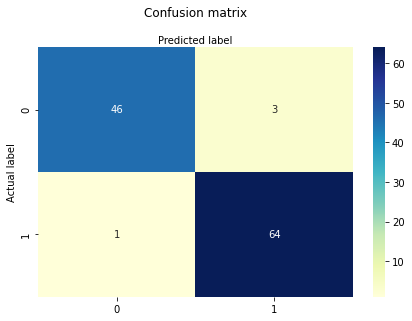

In [21]:
import seaborn as sns
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Traning from 1 to 30 features**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

n = 30;
for i in range(1,n+1):
    X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,
    train_size = 0.8)
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)   
    classifier = LogisticRegression()
    classifier.fit(X_train, Y_train)
    Y1_pred = classifier.predict(X_test)
    print(i,'Components')
    # Accuracy of model 
    print('Accuracy of n=',i,' component', metrics.accuracy_score(Y_test,Y1_pred))
    print('')
    

1 Components
Accuracy of n= 1  component 0.9649122807017544

2 Components
Accuracy of n= 2  component 0.9736842105263158

3 Components
Accuracy of n= 3  component 0.9912280701754386

4 Components
Accuracy of n= 4  component 1.0

5 Components
Accuracy of n= 5  component 0.9912280701754386

6 Components
Accuracy of n= 6  component 0.9912280701754386

7 Components
Accuracy of n= 7  component 0.9649122807017544

8 Components
Accuracy of n= 8  component 0.9736842105263158

9 Components
Accuracy of n= 9  component 0.9824561403508771

10 Components
Accuracy of n= 10  component 0.9736842105263158

11 Components
Accuracy of n= 11  component 1.0

12 Components
Accuracy of n= 12  component 0.9649122807017544

13 Components
Accuracy of n= 13  component 0.9824561403508771

14 Components
Accuracy of n= 14  component 0.9824561403508771

15 Components
Accuracy of n= 15  component 0.9736842105263158

16 Components
Accuracy of n= 16  component 0.9736842105263158

17 Components
Accuracy of n= 17  compone

**It was possible to train a logistic regression over all the features maps**

# **Problem 2**

#### **Standardizing features**

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,train_size = 0.8)

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

#### **Variance ratio of all 30 compoents**

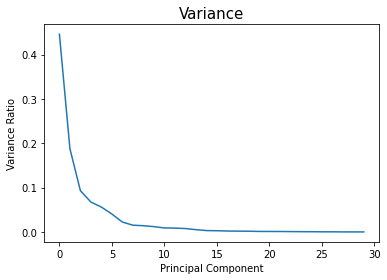

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)

#
pca.fit(X_train)

var = pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
#print(var1)

plt.xlabel('Principal Component', fontsize = 10)
plt.ylabel('Variance Ratio', fontsize = 10)
plt.title('Variance', fontsize = 15)
plt.plot(var)

**Looking that graph above it looks like after 5 components the change in variance dimishes. This means that choosing 5 components results in the best classifiaction accuracy**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

n = 10; # n components

for i in range(1,n+1):
    X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,train_size = 0.8)
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)
    
    pca = PCA(n_components= i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train, Y_train)
    Y1_pred = classifier.predict(X_test)
 
    from sklearn.metrics import confusion_matrix
    from sklearn import metrics
    print(i,'Components')
    # Accuracy of model 
    print('Accuracy of n=',i,' component', metrics.accuracy_score(Y_test,Y1_pred))
    # Precision of model
    print('Precision of n=',i,' component', metrics.precision_score(Y_test,Y1_pred, pos_label='Benign'))
    # Precision of model
    print('Recall of n = ',i,' compoennt', metrics.recall_score(Y_test,Y1_pred, pos_label = 'Benign'))
    print('')
    #cm = confusion_matrix(Y_test, Y1_pred)
    #print(cm)

1 Components
Accuracy of n= 1  component 0.956140350877193
Precision of n= 1  component 1.0
Recall of n =  1  compoennt 0.8863636363636364

2 Components
Accuracy of n= 2  component 0.9473684210526315
Precision of n= 2  component 0.9333333333333333
Recall of n =  2  compoennt 0.9333333333333333

3 Components
Accuracy of n= 3  component 0.956140350877193
Precision of n= 3  component 0.9545454545454546
Recall of n =  3  compoennt 0.9333333333333333

4 Components
Accuracy of n= 4  component 0.9649122807017544
Precision of n= 4  component 1.0
Recall of n =  4  compoennt 0.9166666666666666

5 Components
Accuracy of n= 5  component 0.9824561403508771
Precision of n= 5  component 0.972972972972973
Recall of n =  5  compoennt 0.972972972972973

6 Components
Accuracy of n= 6  component 0.9824561403508771
Precision of n= 6  component 0.9743589743589743
Recall of n =  6  compoennt 0.9743589743589743

7 Components
Accuracy of n= 7  component 0.9824561403508771
Precision of n= 7  component 0.975
Rec

**The result above show that after 5 components the change in Accuracry, Precision, and Recall dimishes**

#### **Ploting for 2 Components**

In [26]:
pca = PCA(n_components = 2)
X = StandardScaler().fit_transform(X1)
Principal_Components = pca.fit_transform(X)
Principal_DF = pd.DataFrame(data = Principal_Components,
                           columns = ['principal component 1', 'principal component 2'])

In [27]:
finalDf = pd.concat([Principal_DF,breast_dataset[['label']]], axis =1)

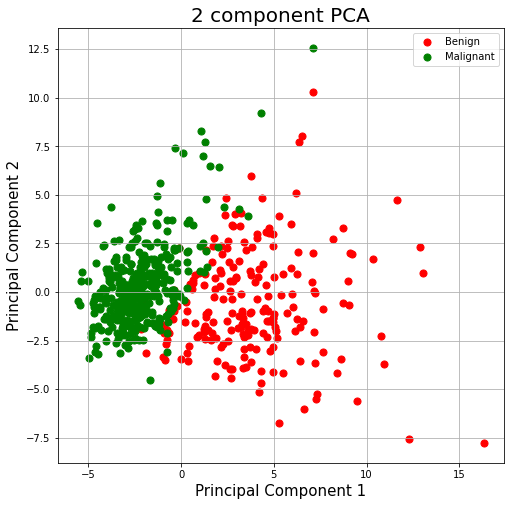

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
labels = ['Benign', 'Malignant']
colors = ['r', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = finalDf['label'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
    ,finalDf.loc[indicesToKeep, 'principal component 2']
        , c = color
        , s = 50)
ax.legend(labels)
ax.grid()

# **Problem 3**

**LDA feature extraction**

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components =1)
lda_t = lda.fit_transform(X1,Y)

**Since there are only two classes, Malignant or Benign, the number of components an only be 1 dimensional.**

In [30]:
#plt.xlabel('LD1')
#plt.ylabel('LD2')
#plt.scatter(lda_t[:,0],np.zeros(lda_t[:1]),c=Y,cmap='rainbow',edgecolors='r')

**Bays classification ccuracy, precision, and recallfrom** 

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Training & Scaling
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,train_size = 0.8)
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test) 

lda.fit(X_train,Y_train)

# Classification
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Pred
Y1_pred = lda.predict(X_test)
print('Accuracy:',metrics.accuracy_score(Y_test,Y1_pred))
# Precision of model
print('Precision',metrics.precision_score(Y_test,Y1_pred, pos_label='Benign'))
# Precision of model
print('Recall',metrics.recall_score(Y_test,Y1_pred, pos_label = 'Benign'))
confusion_matrix(Y_test,Y1_pred)

Accuracy: 0.9473684210526315
Precision 1.0
Recall 0.8695652173913043


array([[40,  6],
       [ 0, 68]], dtype=int64)

**Accuracy and precision is high, simialr to Problem 1 and 2**

# **Problem 4**

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components =1)
lda_t = lda.fit_transform(X1,Y)

**LDA Logistic Regression classification accuracy, precision, and recall**

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Training 
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,train_size = 0.8)

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test) 

lda.fit(X_train,Y_train)

# Classification
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
Y1_pred = classifier.predict(X_test)

# Pred
Y1_pred = lda.predict(X_test)
print('Accuracy:',metrics.accuracy_score(Y_test,Y1_pred))
# Precision of model
print('Precision',metrics.precision_score(Y_test,Y1_pred, pos_label='Benign'))
# Precision of model
print('Recall',metrics.recall_score(Y_test,Y1_pred, pos_label = 'Benign'))
confusion_matrix(Y_test,Y1_pred)

Accuracy: 0.9649122807017544
Precision 1.0
Recall 0.9148936170212766


array([[43,  4],
       [ 0, 67]], dtype=int64)

**The accuracy and precision are the same however, the recall is higher then the Problem 2 and 3. This is due to an decress in Fasle Positives**